In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
702,0,18.0,14.4542
832,0,NaN,7.2292
50,0,7.0,39.6875
233,1,5.0,31.3875
340,1,2.0,26.0000


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### putting new cols in dataframe df of imputed_age in train and test 

In [7]:
X_train['Imputed_Age']=X_train['Age']
X_test['Imputed_Age']=X_test['Age']

In [8]:
X_train

,Age,Fare,Imputed_Age
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [17]:
X_train['Imputed_Age'][X_train['Imputed_Age'].isnull()] = X_train['Imputed_Age'].dropna().sample(X_train['Imputed_Age'].isnull().sum()).values

X_train

In [19]:
X_test['Imputed_Age'][X_test['Imputed_Age'].isnull()] = X_test['Imputed_Age'].dropna().sample(X_test['Imputed_Age'].isnull().sum()).values

## Ploting distribution between Age and imputed age

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


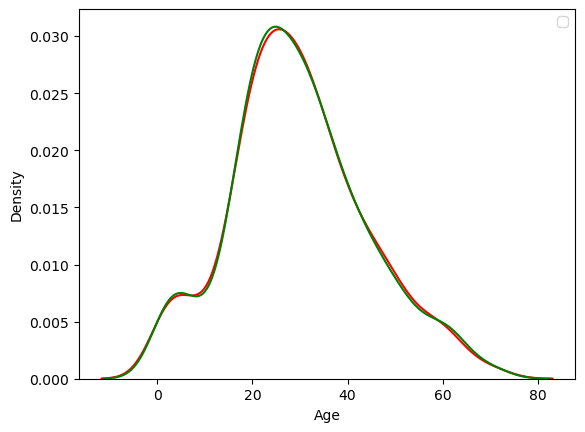

In [21]:
sns.kdeplot(X_train['Age'],color='red')
sns.kdeplot(X_train['Imputed_Age'],color='green')
plt.legend()
plt.show()

In [23]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Imputed_Age'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  205.20018431707217


### But we see some changes in covariance 

In [25]:
X_train[['Fare', 'Age', 'Imputed_Age']].cov()

,Fare,Age,Imputed_Age
Fare,2368.246832,71.512440,39.164613
Age,71.512440,204.349513,204.349513
Imputed_Age,39.164613,204.349513,205.200184


<Axes: >

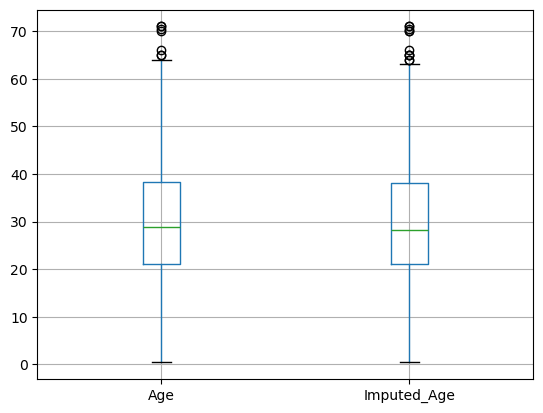

In [27]:
X_train[['Age', 'Imputed_Age']].boxplot()

# For categorical values

In [28]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [29]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [30]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [31]:

X = data
y = data['SalePrice']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [34]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\PARTH\AppData\Local\Temp\ipykernel_19052\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\PARTH\AppData\Local\Temp\ipykernel_19052\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\PARTH\AppData\Local\Temp\ipykernel_19052\856878696.py:4: SettingWithCopyWarning: 
A va

In [35]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [36]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: Line2D.set() got an unexpected keyword argument 'hist'

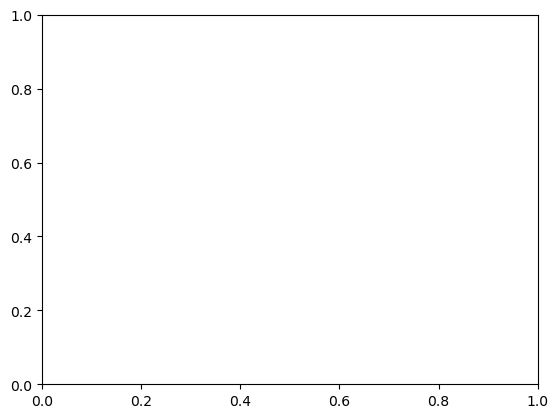

In [38]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [ ]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()